In [1]:
import os
import nltk
from keybert import KeyBERT
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
# Change working directory
os.chdir('..')

# Import NewsDataLoader and configuration
from src.loader import NewsDataLoader
from src.config import cfg

# Import utility functions
import src.utils as utils


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Namespace(output='news_output.csv', path='data', news='rating.csv', traffic='trafiic.csv', domain='domains_location.csv')
Output File: news_output.csv
Path: data
News Data: rating.csv
Traffic Data: trafiic.csv
Domain Location Data: domains_location.csv


In [9]:
# Load data
data_loader = NewsDataLoader(cfg.path)
data_df = data_loader.get_news_data()
traffic_data = data_loader.get_traffic_data()
domains_df = data_loader.get_domain_location_data()
data = data_df.head(100)

In [10]:
# Define KeyBERT model (adjust parameters as needed)
keybert = KeyBERT()


In [12]:
documents = data['content'].tolist()
titles = data['title'].tolist()


In [13]:
# Extract keywords from headlines
title_keywords = [keybert.extract_keywords(doc, top_n=5) for doc in titles]

# Extract keywords from news bodies
content_keywords = [keybert.extract_keywords(doc, top_n=5) for doc in documents]


In [14]:
from collections import Counter

def jaccard_similarity(set1, set2):
  intersection = len(set(set1) & set(set2))
  union = len(set(set1) | set(set2))
  return intersection / float(union) if union else 0

# Calculate Jaccard similarity for each title-content pair
jaccard_similarities = [jaccard_similarity(set(kws[0]), set(kws[1])) for kws in zip(title_keywords, content_keywords)]


In [15]:
# Calculate overlap count for each title-content pair
overlap_counts = [len(set(kws[0]) & set(kws[1])) for kws in zip(title_keywords, content_keywords)]


Average Jaccard similarity: 0.0


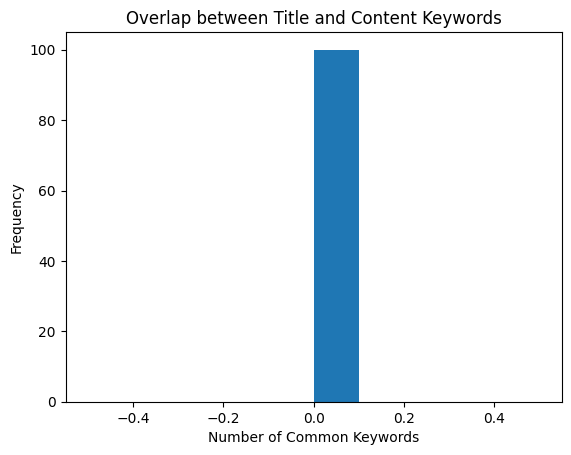

In [16]:
# Print average Jaccard similarity
print(f"Average Jaccard similarity: {sum(jaccard_similarities) / len(jaccard_similarities)}")

# Plot the distribution of overlap counts (optional)
import matplotlib.pyplot as plt

plt.hist(overlap_counts)
plt.xlabel("Number of Common Keywords")
plt.ylabel("Frequency")
plt.title("Overlap between Title and Content Keywords")
plt.show()
